# The Singular Value Decomposition

The singular value decomposition is arguably the most important exact matrix decomposition. 

The decomposition has the following form:
$$A = U \Sigma V^T$$
Here $U,V$ orthonormal, $\Sigma$ diagonal with positive entries. These entries can be sorted and are called the singular values. The columns of $U$ and $V$ are known as the singular vectors.

Many important properties of the matrix $A$ can be extracted from its SVD.

* A $m\times n$ matrix $A$ represents a linear transformation $f$ between two spaces $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$. The existence of SVD is a manifestation of the following fact: 
Every linear transformation can be viewed as a rotation followed by an independent scaling along the coordinates, followed by an other rotation.
$$
Ax = U (\Sigma (V^\top x))
$$



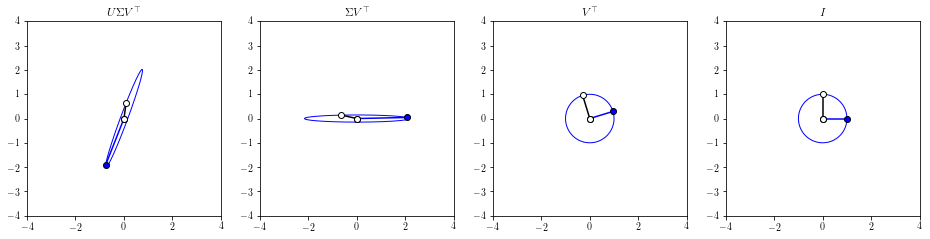

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

from notes_utilities import pnorm_ball_points
from notes_utilities import bmatrix

np.set_printoptions(precision=3, suppress=True)


rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(1,4,4)
ax2 = plt.subplot(1,4,3)
ax3 = plt.subplot(1,4,2)
ax4 = plt.subplot(1,4,1)

dx,dy = pnorm_ball_points()
X = np.c_[dx,dy].T
B = np.c_[np.zeros((2,1)), np.eye(2)]

ln_domain_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')
ln_e1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_e2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax1.add_line(ln_domain_ball)
ax1.add_line(ln_e1)
ax1.add_line(ln_e2)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.set_title('$I$')

A = np.random.randn(2,2)
U,S,V=np.linalg.svd(A)

X = V.dot(X)
B = V.dot(B)
ln_VTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_VTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_VTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax2.add_line(ln_VTx)
ax2.add_line(ln_VTe1)
ax2.add_line(ln_VTe2)

ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.set_title('$V^\\top$')

S = np.diag(S)
X = S.dot(X)
B = S.dot(B)
ln_SVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_SVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_SVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax3.add_line(ln_SVTx)
ax3.add_line(ln_SVTe1)
ax3.add_line(ln_SVTe2)

ax3.set_xlim([-4,4])
ax3.set_ylim([-4,4])
ax3.set_aspect('equal')
ax3.set_title(r'$\Sigma V^\top$')

X = U.dot(X)
B = U.dot(B)
ln_USVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_USVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_USVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax4.add_line(ln_USVTx)
ax4.add_line(ln_USVTe1)
ax4.add_line(ln_USVTe2)

ax4.set_xlim([-4,4])
ax4.set_ylim([-4,4])
ax4.set_aspect('equal')
ax4.set_title(r'$U \Sigma V^\top$')

plt.show()




* SVD gives an approximation to the matrix $A$ in terms of rank one matrices

$$
A = U\Sigma V^\top
$$

$$
A = \sigma_1 u_1 v_1^\top + \sigma_2 u_2 v_2^\top + \dots + \sigma_n u_n v_n^\top
$$

* For any $r$ smaller than the rank $R=\min(M,N)$ of the matrix $A$, we can obtain the best 
approximation, i.e.,
$$
A_r = \sum_{i=1}^r \sigma_r u_r v_r^\top 
$$

The error $E = A - A_r$ is smallest (as measured by $\|E\|_F^2$) for any rank $r$ approximation of $A$.

* Columns of matrix $U$ are known as 'Principal Components'



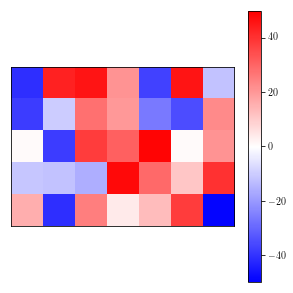

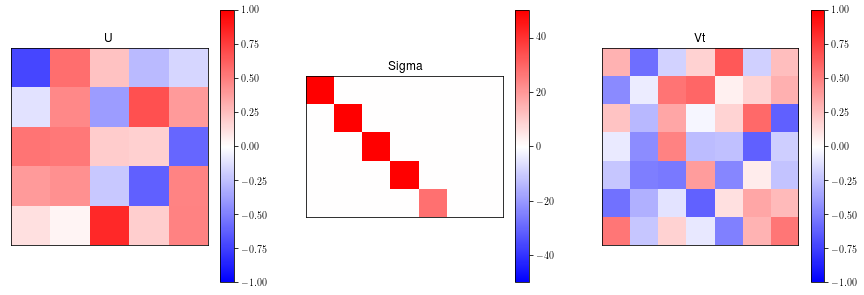

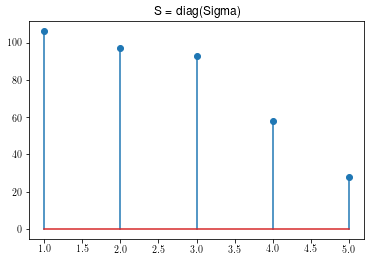

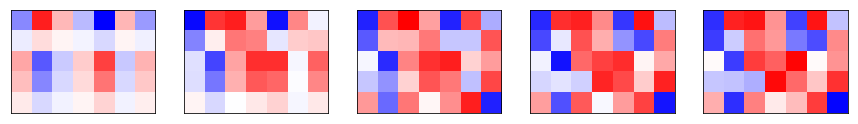

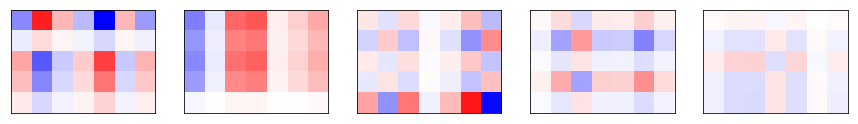

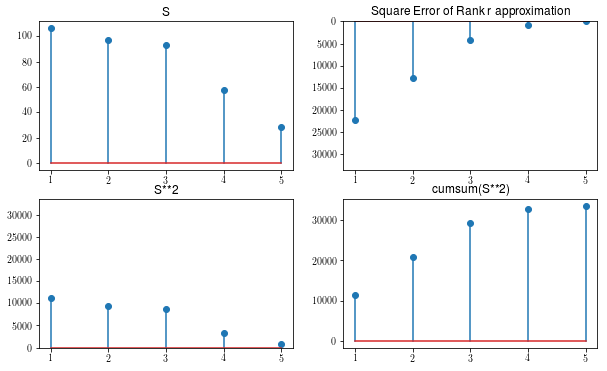

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.linalg as la

M = 5
N = 7

Range = 50
A = np.ceil(2*Range*np.random.rand(M, N)-Range)


def show_matrix(X, Range=Range, cmap='bwr', cbar=True):
    plt.imshow(X, interpolation='nearest', cmap=cmap, vmin=-Range, vmax=Range)
    if cbar:
        plt.colorbar()
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(5,5))
show_matrix(A)
plt.show()

U,S,Vt = la.svd(A)
Sig = la.diagsvd(S, M, N)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
show_matrix(U, cmap='bwr', Range=1)
plt.title('U')
plt.subplot(1,3,2)
show_matrix(Sig, cmap='bwr')
plt.title('Sigma')
plt.subplot(1,3,3)
show_matrix(Vt, cmap='bwr', Range=1)
plt.title('Vt')
plt.show()

#print('U')
#print(U)

#print('S')
#print(S)

#print('V')
#print(Vt)

plt.figure()
plt.title('S = diag(Sigma)')
rr = range(1,len(S)+1)
plt.stem(rr, S)
plt.show()

E = []
plt.figure(figsize=(15,4))
maxRank = min(M,N)
for rnk in range(maxRank):
    Sr = np.zeros_like(S)
    Sr[0:rnk+1] = S[0:rnk+1]
    Sig = la.diagsvd(Sr, M, N)
    A2 = np.dot(np.dot(U, Sig), Vt)
    
    e = np.sum((A - A2)**2)
    E.append(e)
    
    plt.subplot(1,M,rnk+1)
    show_matrix(A2, cmap='bwr', Range=Range, cbar=False)
    
plt.show()


plt.figure(figsize=(15,4))
for rnk in range(maxRank):
    Sr = np.zeros_like(S)
    Sr[rnk] = S[rnk]
    Sig = la.diagsvd(Sr, M, N)
    A2 = np.dot(np.dot(U, Sig), Vt)
    plt.subplot(1,M,rnk+1)
    show_matrix(A2, cmap='bwr', Range=Range, cbar=False)
    
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,2,3)
ylim = np.sum(S**2)
plt.ylim([0, ylim])
plt.title('S**2')
rr = range(1,len(S)+1)
plt.stem(rr, S**2)

plt.subplot(2,2,4)
plt.title('cumsum(S**2)')
plt.stem(rr,np.cumsum(S**2))

plt.subplot(2,2,2)
plt.ylim(ylim)
plt.title('Square Error of Rank r approximation')
plt.stem(rr,E)

plt.subplot(2,2,1)
plt.title('S')
plt.stem(rr, S)

plt.show()




It is sometimes said, that the principal components do not always yield to an easily interpretable representation. Below, we illustrate this observation on a dataset of hanwritten digits (the famous MNIST dataset):

In [7]:
from itertools import product
from matplotlib.pylab import plt
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')


We will work with a smaller version of MNIST as this will be sufficient to illustrate our point. 

In [63]:
X = mnist.data[0:-1:50].T
c = mnist.target[0:-1:50]
# Number of samples
N = X.shape[1]

# One-hot encoding of target values, for visualization
C = np.zeros((10,N))
for i in range(N):
    C[int(c[i]), i] = 1
    

Here, every column of the matrix $X$ is a pixel representation of an $28\times 28$ digit image. Below, we visualize the entire matrix as an heatmap. We don't quite see a digit yet, but can see that images of the same digits are organized next to each other

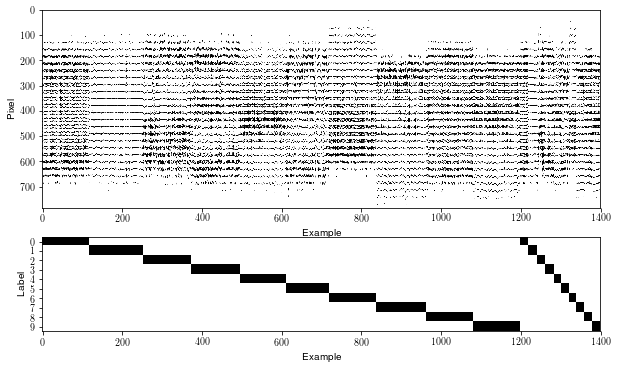

In [64]:

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.imshow(X, cmap='gray_r', aspect='auto')
plt.xlabel('Example')
plt.ylabel('Pixel')
plt.subplot(4,1,3)
plt.imshow(C, cmap='gray_r', aspect='auto')
plt.xlabel('Example')
plt.ylabel('Label')
plt.yticks(range(10))
plt.show()

To visualize a digits, we need to reshape a column of $X$ into a $28\times 28$ matrix.

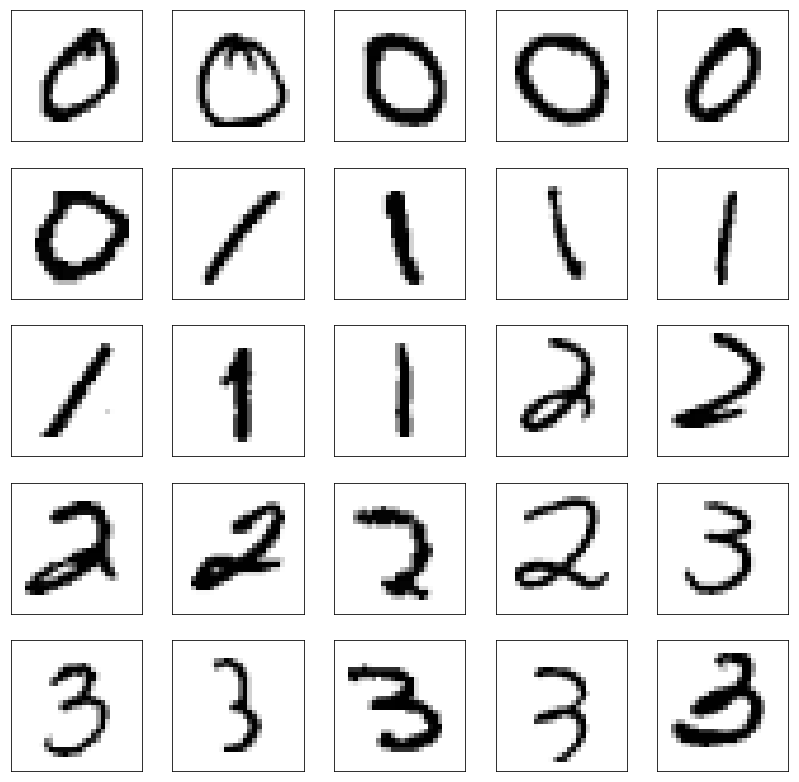

In [66]:

M = 5
N = 5
plt.figure(figsize=(14,14))
i = 0
for v,w in product(range(N), range(M)):
    i+=1
    plt.subplot(M,N,i)
    plt.imshow(X[:,(i-1)*20].reshape((28,28)), cmap='gray_r',vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    #plt.colorbar()

plt.show()


In [ ]:
U,S,Vt = la.svd(X)

We have now computed the SVD of the entire $X$ matrix. The columns of the  matrix $U$ are the principle components. Let's visualize the first one.

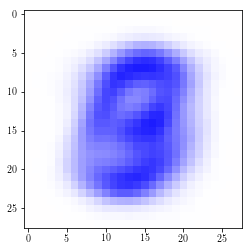

In [67]:
plt.imshow(U[:,0].reshape((28,28)), cmap='bwr',vmin=-0.1, vmax=0.1)
plt.show()

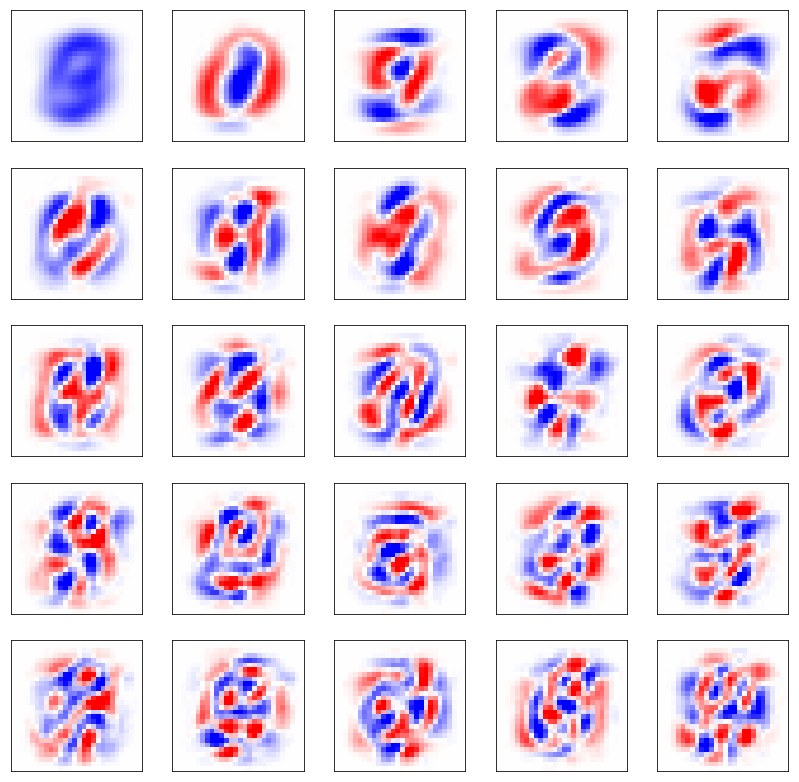

In [94]:


fig2 = plt.figure(figsize=(14,14))
i = 0
for v,w in product(range(N), range(M)):
    i+=1
      
    plt.subplot(M,N,i)
    plt.imshow(U[:,i-1].reshape((28,28)), cmap='bwr',vmin=-0.1, vmax=0.1)
    plt.xticks([])
    plt.yticks([])
    
    #plt.colorbar()

plt.show()

In [86]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

plt.figure(figsize=(10,5))
def plot_fit(idx, example_idx = 0):
    
    plt.subplot(1,4,1)
    plt.imshow(X[:,example_idx].reshape((28,28)), cmap='bwr',vmin=-255,vmax=255)
    plt.subplot(1,4,2)
    plt.imshow(U[:,0:idx].dot(np.diag(S[0:idx])).dot(Vt[0:idx,example_idx]).reshape((28,28)), cmap='bwr',vmin=-255,vmax=255)
    plt.subplot(1,4,3)
    plt.imshow(U[:,idx-1].reshape((28,28))*S[idx-1]*Vt[idx-1,example_idx]/S[0], cmap='bwr',vmin=-0.005, vmax=0.005)
    plt.subplot(1,4,4)
    plt.imshow(U[:,idx-1].reshape((28,28)), cmap='bwr',vmin=-0.1, vmax=0.1)
    
    plt.show()
    
interact(plot_fit, idx=(1,H.shape[0],1), example_idx=(0,X.shape[1],1))

interactive(children=(IntSlider(value=32, description='idx', max=64, min=1), IntSlider(value=0, description='example_idx', max=1400), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_fit>

In [41]:
import numpy as np
from sklearn.decomposition import NMF

M=8
N=8
model = NMF(n_components=M*N, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_


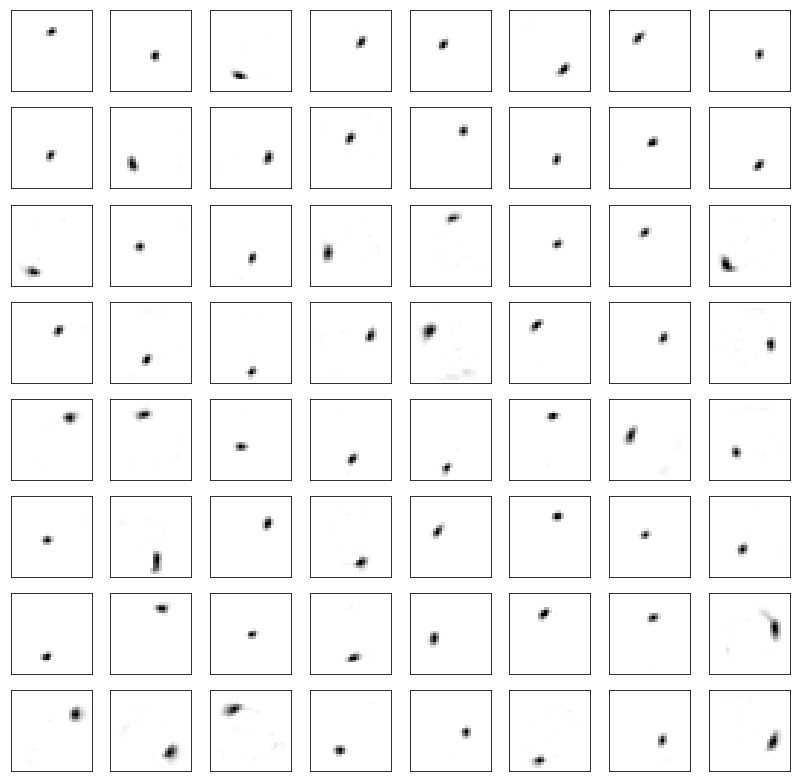

In [42]:
plt.figure(figsize=(14,14))
i = 0
for v,w in product(range(N), range(M)):
    i+=1
    plt.subplot(M,N,i)
    plt.imshow(W[:,i-1].reshape((28,28)), cmap='gray_r',vmin=0)
    plt.xticks([])
    plt.yticks([])

In [69]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

plt.figure(figsize=(10,5))
def plot_fit(idx):
    plt.subplot(1,2,1)
    plt.imshow(W.dot(H[:,idx]).reshape((28,28)), cmap='gray_r',vmin=0)
    plt.subplot(1,2,2)
    plt.imshow(X[:,idx].reshape((28,28)), cmap='gray_r',vmin=0)
    
    plt.show()
    
interact(plot_fit, idx=(0,H.shape[1],1))

interactive(children=(IntSlider(value=700, description='idx', max=1400), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_fit>

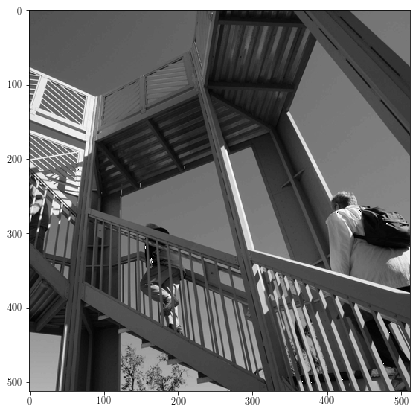

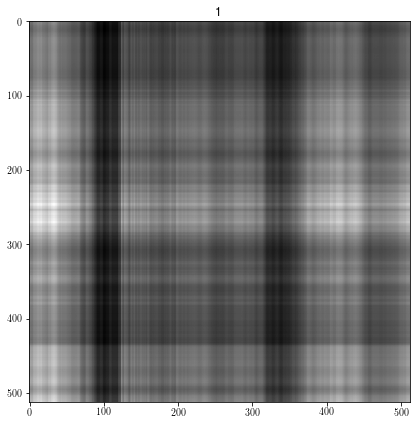

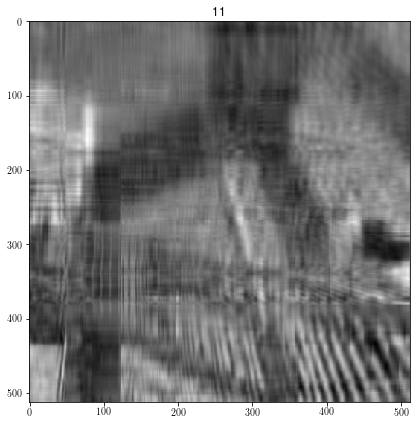

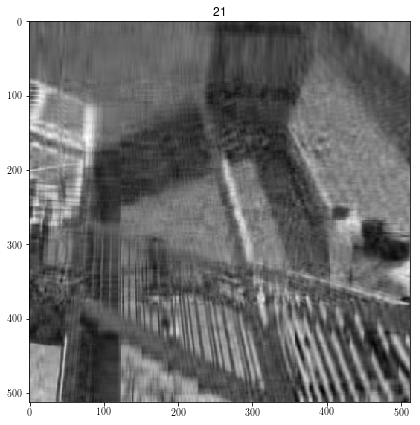

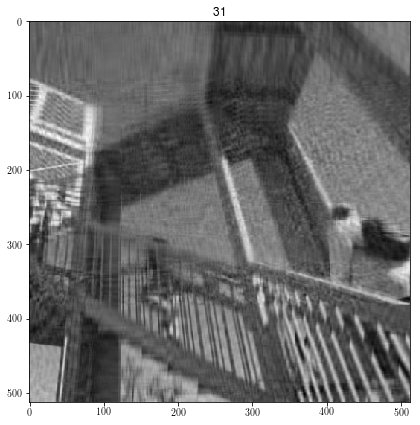

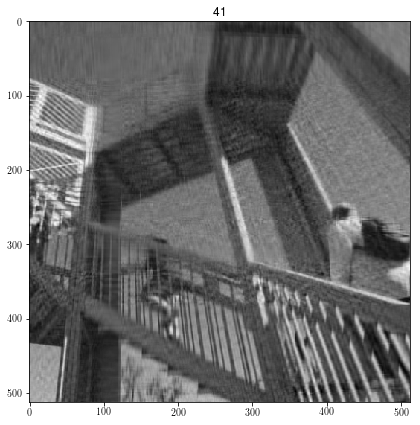

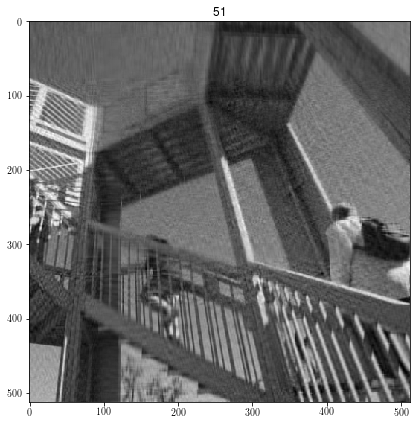

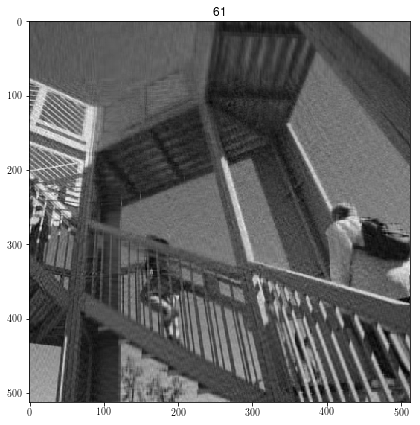

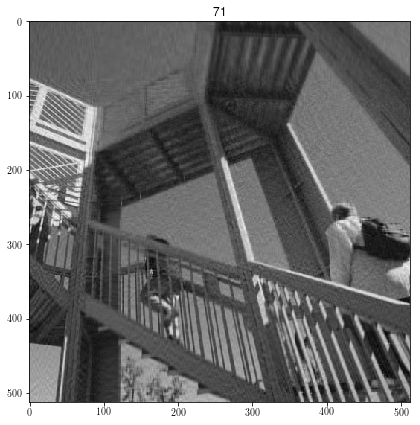

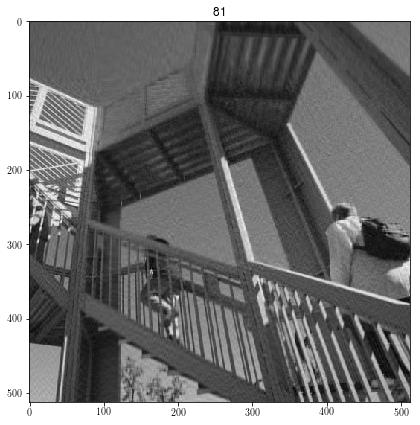

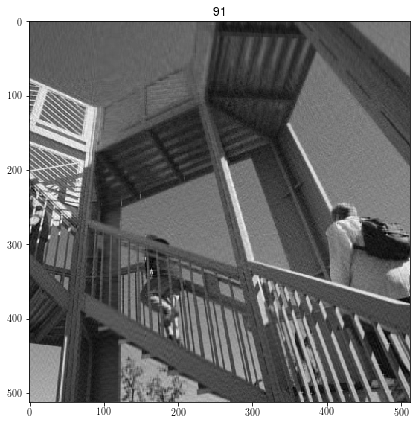

In [30]:
import scipy as sc
import scipy.misc

X = scipy.misc.ascent()

fig = plt.figure(figsize=(7,7))
plt.gray()
plt.imshow(X)
plt.show()

U,S,Vt = la.svd(X)

M,N = X.shape

for rnk in range(1,100,10):

    Sr = np.zeros_like(S)

    Sr[0:rnk] = S[0:rnk]
    Sig = la.diagsvd(Sr, M, N)

    A2 = np.dot(np.dot(U, Sig), Vt)

    fig = plt.figure(figsize=(7,7))
    plt.gray()
    plt.imshow(A2)
    plt.title(rnk)
    plt.show()


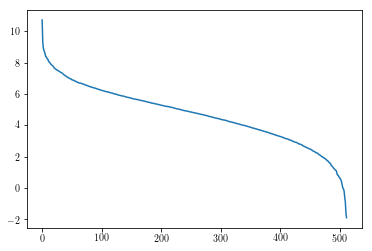

In [32]:
plt.plot(np.log(S))
plt.show()

## SVD By ALS

First, we attemp to solve the rank one approximation problem

$\newcommand{\trace}{\mathop{\text{Tr}}}$

\begin{eqnarray}
\text{minimize} \| X - \lambda u v^\top \|^2_F \;\;\text{subject to}\;\; \|u\| = \|v\| = 1
\end{eqnarray}


\begin{eqnarray}
\| X - \lambda u v^\top \|^2_F = \trace (X - \lambda u v^\top)^\top (X - \lambda u v^\top)& = & \trace X^\top X - \trace 2 \lambda X^\top u v^\top + \trace \lambda^2 v u^\top u v^\top \\
&= &\trace X^\top X - 2 \lambda \trace X v^\top u + \lambda^2 
\end{eqnarray}

The Lagrangian is 
\begin{eqnarray}
\Lambda(\lambda, u, v, \nu_u, \nu_v) & = & - 2 \lambda \sum_{i,j} X(i,j) u(i) v(j) + \lambda^2 + \nu_u (\sum_i u(i)^2 - 1) + \nu_v (\sum_j v(j)^2 - 1)  \\
\frac{\partial \Lambda}{\partial \lambda} & = & - 2 \sum_{i,j} X(i,j) u(i) v(j) + 2 \lambda \\
\lambda & = & \sum_{i,j} X(i,j) u(i) v(j) \\
\frac{\partial \Lambda}{\partial u(i)} & = & - 2 \lambda \sum_{j} X(i,j) v(j) + 2 \nu_u u(i)  \\
u(i) & = & \frac{\lambda}{\nu_u}  \sum_{j} X(i,j) v(j)
\end{eqnarray}

\begin{eqnarray}
\sum_i u(i)^2 & = & \frac{\lambda^2}{\nu_u^2} \sum_i (\sum_{j} X(i,j) v(j))^2 = 1 \\
%\nu_u^2 & = & \lambda^2\sum_i (\sum_{j} X(i,j) v(j))^2 \\
\nu_u & = & \pm \lambda \sqrt{\sum_i (\sum_{j} X(i,j) v(j))^2} 
\end{eqnarray}
Substituting back the Lagrange multiplier we obtain
\begin{eqnarray}
u(i) & = & \frac{\sum_{j} X(i,j) v(j)}{\sqrt{\sum_{i'} (\sum_{j} X(i',j) v(j))^2} } 
\end{eqnarray}
By symmetry, the update for $v$ is similar
\begin{eqnarray}
v(j) & = & \frac{\sum_{i} X(i,j) u(i)}{\sqrt{\sum_{j'} (\sum_{i} X(i,j') u(i))^2} } 
\end{eqnarray}

We obtain the following alternating algorithm known as the Power iteration
\begin{eqnarray}
\lambda^{(\tau)} & \leftarrow & {u^{(\tau-1)}}^\top X v^{(\tau-1)} \\
u^{(\tau)} & \leftarrow & Xv^{(\tau-1)}/\|Xv^{(\tau-1)}\| \\
v^{(\tau)} & \leftarrow & X^\top u^{(\tau)} /\|X^\top u^{(\tau)}\| 
\end{eqnarray}

It is informative to contrast this with the ALS algorithm one would obtain for the following problem
\begin{eqnarray}
\text{minimize} \| X - a b^\top \|^2_F 
\end{eqnarray}
The updates are 
\begin{eqnarray}
a & \leftarrow &  X b (b^\top b)^{-1} \\
b & \leftarrow &  X^\top a (a^\top a)^{-1} \\
\end{eqnarray}
If $a$ and $b$ were forced to be unit norm with $(a^\top a)^{-1} = (b^\top b)^{-1} = 1$ throughout, we would 
obtain the Power iteration algorithm.

In [98]:
from numpy.random import randn
from numpy.linalg import norm

EPOCH = 20
M = 5
N = 7
X = randn(M, N)

U, S, V = np.linalg.svd(X)
print(S)

u = randn(M)
v = randn(N)
u = u/norm(u)
v = v/norm(v)

for e in range(EPOCH):
    lam = u.dot(X).dot(v)
    u = X.dot(v)
    u = u/norm(u)
    v = u.dot(X)
    v = v/norm(v)
    print(lam)

[ 5.461  3.458  2.836  1.884  1.681]
-0.858100260874
5.26072612247
5.45491937642
5.46068133852
5.46106659364
5.4611092592
5.46111499694
5.46111584179
5.46111597203
5.46111599256
5.46111599584
5.46111599636
5.46111599644
5.46111599646
5.46111599646
5.46111599646
5.46111599646
5.46111599646
5.46111599646
5.46111599646


$\newcommand{\diag}{\mathop{\text{diag}}}$

We can also derive the matrix analogue of the rank one approximation by solving the following minimization problem:
\begin{eqnarray}
\text{minimize} \| X - U \Sigma V^\top \|^2_F \;\;\text{subject to}\;\; U^\top U = I, V^\top V = I, \Sigma = \diag  \sigma
\end{eqnarray}
Here $X$ is $m \times n$, $U$ is $m\times k$, $\Sigma$ is $k \times k$, and $V$ is $n \times k$.


\begin{eqnarray}
\| X - U \Sigma V^\top \|^2_F = \trace (X - U \Sigma V^\top)^\top (X - U \Sigma V^\top) 
\end{eqnarray}

\begin{eqnarray}
\| X - U \Sigma V^\top \|^2_F = \trace \left(X^\top X - 2 X^\top U \Sigma V^\top + V \Sigma U^\top U \Sigma V^\top\right)
\end{eqnarray}

Substituting $U^\top U = I$ and $V^\top V = I$ and ignoring constant terms we define 

\begin{eqnarray}
\mathcal{E}(U, V, \Sigma) & = & - 2 \trace V^\top X^\top U \Sigma  + \trace \Sigma^\top \Sigma + \trace \Lambda_u^\top (I - U^\top U) + \trace \Lambda_v^\top (I - V^\top V) \\
\frac{d \mathcal{E} }{d \Sigma} & = & -2 U^\top X V + 2 \Sigma = 0 \\
\Sigma & = & U^\top X V 
\end{eqnarray}

\begin{eqnarray}
\frac{d \mathcal{E} }{d U} & = & - 2 X V \Sigma + 2 U \Lambda_u \\
U & = & X V \Sigma \Lambda_u^{-1} \\
\end{eqnarray}

\begin{eqnarray}
U^\top U & = & I = {\Lambda_u^{-1}}^\top \Sigma^\top V^\top X^\top  X V \Sigma {\Lambda_u^{-1}} \\
\Lambda_u^\top \Lambda_u & = & \Sigma^\top V^\top X^\top  X V \Sigma \\
\Lambda_u^2 & = & R^\top R \\
\Lambda_u & = & (R^\top R)^{1/2} 
\end{eqnarray}
The last line follows as $\Lambda_u$ is symmetric and a QR factorization as $QR = X V \Sigma$.

\begin{eqnarray}
U & = & Q R (R^\top R)^{-1/2} 
\end{eqnarray}
Now, as 
$
R (R^\top R)^{-1/2} (R^\top R)^{-1/2} R^\top = R (R^\top R)^{-1} R^\top = R R^{-1} {R^\top}^{-1} R^\top = I
$
this implies that $R (R^\top R)^{-1/2} = P$ is some othonormal matrix. This implies that $U$ and $QP$ span the same subspace.


$%\sum_i \sum_j (X(i,j) - \sum_k U(i,k) V(j,k) \sigma(k))^2$

A more general algorithm proceeds by tracking the subspaces

In [102]:
EPOCH = 40
M = 5
N = 5
K = 5
X = randn(M, N)

U, S, V = np.linalg.svd(X)
print(X)
print('U')
print(U)
print('S')
print(S)
U = np.matrix(U)
V = np.matrix(V)

[[-0.414 -0.65  -0.303 -0.529 -0.161]
 [ 0.676  2.041  1.058 -0.709  0.412]
 [ 0.426 -0.299  1.83   0.49  -0.421]
 [ 0.518  0.48  -1.397  0.917 -1.53 ]
 [ 0.925 -2.264  1.57   0.351  0.235]]
U
[[ 0.036  0.2   -0.295 -0.208  0.91 ]
 [-0.173 -0.838  0.182  0.354  0.331]
 [ 0.416 -0.256  0.51  -0.707  0.043]
 [-0.379  0.416  0.773  0.197  0.219]
 [ 0.807  0.139  0.152  0.542  0.111]]
S
[ 3.547  2.873  1.988  0.762  0.577]


In [111]:
from numpy.random import randn
from numpy.linalg import norm
from numpy.linalg import qr

def subspace_iteration(X, K=1, verbose=False, EPOCH = 40, correct_signs=True):
    M, N = X.shape
    
    u = randn(M,K)
    v = randn(N,K)
    u,dummy = qr(u)
    v,dummy = qr(v)

    for e in range(EPOCH):
        lam = u.T.dot(X).dot(v)
        u = X.dot(v)
        u,dummy = qr(u)
        v = u.T.dot(X).T
        v,dummy = qr(v)
        if verbose:
            if e%10==0:
                print(lam)
        
    if correct_signs:
        signs = np.sign(np.diag(lam))
        return signs*u, signs*lam, v
    else:
        return u, lam, v

In [112]:
u, lam, v = subspace_iteration(X, K=3, correct_signs=True)
print(u)
print(lam)

#print(u.dot(lam).dot(v.T))

[[-0.036  0.2   -0.295]
 [ 0.173 -0.838  0.182]
 [-0.416 -0.256  0.51 ]
 [ 0.379  0.416  0.773]
 [-0.807  0.139  0.152]]
[[ 3.547  0.     0.   ]
 [-0.     2.873 -0.   ]
 [ 0.     0.     1.988]]


In [40]:
U*np.diag(S)*V

matrix([[-1.291, -0.038,  1.085, -0.974, -0.925],
        [-0.531, -1.174, -0.261,  0.124,  0.215],
        [-0.112,  1.064, -0.861, -0.206, -0.172],
        [ 0.854, -1.926,  0.696,  0.837,  0.886],
        [-0.502,  0.399,  3.142,  0.036,  0.677]])

In [142]:
idx = [0,1,2,3,4]
U[:,idx]*np.diag(S[idx])*V[idx,:]

matrix([[ 0.96 , -0.382, -1.081, -0.285, -0.741],
        [-0.621,  2.472,  0.894,  1.575, -0.013],
        [-0.292,  1.159, -1.293,  0.352, -1.391],
        [ 1.   ,  1.241,  0.28 , -1.637, -0.767],
        [ 0.425,  0.14 , -1.692,  0.788,  0.285]])

In [138]:
np.diag(S[idx])

array([[ 3.378,  0.   ],
       [ 0.   ,  2.836]])

In [94]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
# 
# import seaborn as sns
# sns.set(color_codes=True)

# plt.figure(figsize=(5,5))
# df = pd.read_csv(u'data/wind_tribune.csv')
# sns.jointplot(x='wind_speed', y='production', data=df);
# plt.show()

In [33]:
df_iris = pd.read_csv(u'data/iris.txt',sep=' ')

In [34]:
X = np.array(df_iris[['sl','sw','pl','pw']]).T
X = X - np.mean(X, axis=1, keepdims=True)

In [153]:
U, S, V = np.linalg.svd(X, full_matrices=False)


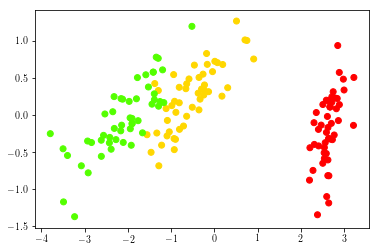

In [154]:
plt.scatter(S[0]*V[0,:], S[1]*V[1,:], c=df_iris['c'],cmap='prism')
plt.show()

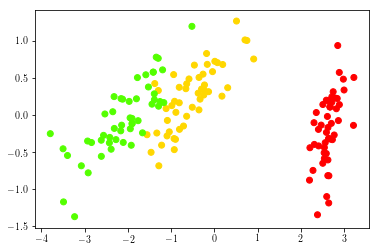

In [170]:
U, S, V = subspace_iteration(X, K=2)
plt.scatter(S[0,0]*V[:,0], S[1,1]*V[:,1], c=df_iris['c'],cmap='prism')
plt.show()


## A linear autoencoder

Can we project a collection of points to a low dimensional subspace and reconstruct them back with minimum error? 

This question can be framed as the following approximation problem:
Given a dataset of $N$ points, arranged in a $D\times N$ matrix, we wish to find
$$
X \approx Q Q^\top X
$$
where $Q$ is an $D\times K$ matrix of mutually orthogonal vectors: $Q^\top Q = I$ and $X$ is a $D \times N$ matrix.

We can write the same problem as 
\begin{align}
0 \approx (I-QQ^\top) X
\end{align}
where we minimize the error $\mathcal{E}(Q) = \|0 - (I-QQ^\top) X\|_F^2 $

\begin{align}
\mathcal{E}(Q) & =  \trace X^\top (I-QQ^\top)^\top (I-QQ^\top) X  \\
& =  \trace X^\top (I- QQ^\top -QQ^\top + Q Q^\top Q Q^\top) X \\
& =  \trace X^\top X - \trace QQ^\top X X^\top  \\
\end{align}

This shows that we can equivalently pose the problem as a maximization problem
\begin{align}
\text{maximize} &\; \trace Q^\top X X^\top Q \\
\text{subject to} &\; Q^\top Q = I 
\end{align}

\begin{align}
L(Q, \Lambda) & = & \trace Q^\top X X^\top Q - \trace \Lambda^\top (I - Q^\top Q)
\end{align}

\begin{align}
\frac{d L}{dQ}  = 2 X X^\top Q - 2 Q \Lambda 
\end{align}

\begin{align}
0  & = 2 X X^\top Q - 2 Q \Lambda \\
   \Lambda   & =  Q^\top X X^\top  Q\\
\end{align}
This implies that $Q$ are just the dominant eigenvectors of the emprical covariance matrix
